# Import libraries:

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data:

In [40]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploratory Data Analysis:

In [41]:
train.shape

(891, 12)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above table, we learn that "Age", "Cabin" and "Embarked" have null values or NaN.

We can visualize these null values using a heatmap:

<AxesSubplot:>

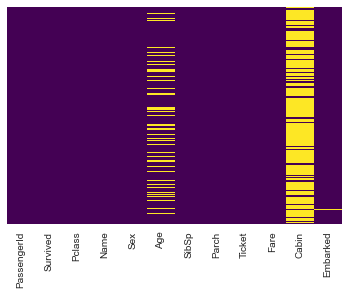

In [44]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= "viridis")

We can see that "Cabin" is missing too many values. We can either drop it or change it to another feature later.

We can also check which rows of a particular column have null values:

In [45]:
train[pd.isnull(train.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


To better understand the data, we can visualize some more of it:

<AxesSubplot:xlabel='Survived', ylabel='count'>

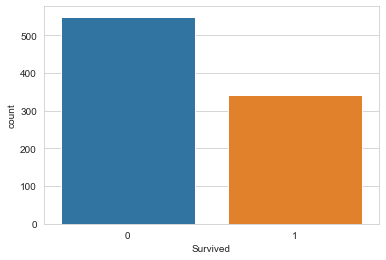

In [46]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data= train)

We see that most of the passengers didn't survive the shipwrech. But how many of them were men and how many were women?

We can plot that too using seaborn library:

<AxesSubplot:xlabel='Survived', ylabel='count'>

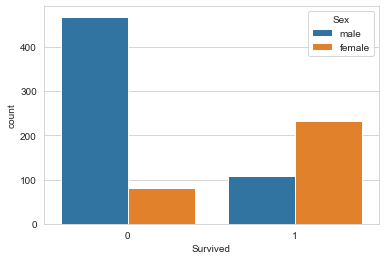

In [47]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue= "Sex", data= train)

We can see that roughly 2/3 of women survived while most men didn't.

We can check the survival rate based on other factors as well:

<AxesSubplot:xlabel='Survived', ylabel='count'>

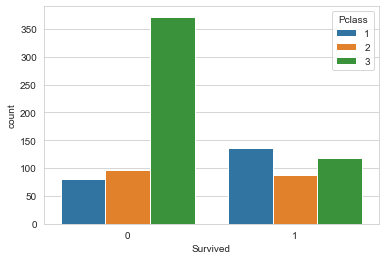

In [48]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue= "Pclass", data= train)

From this plot, we learn that people from 1st class were able to survive more than people from other classes. People from 3rd class had lowest chance of survival.

For "Age" which is a numerical variable, we can draw a distribution plot:

<AxesSubplot:xlabel='Age', ylabel='Count'>

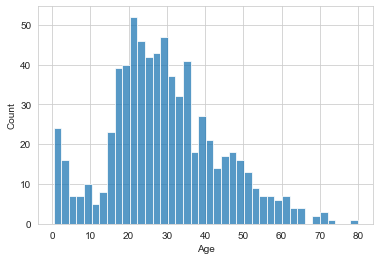

In [49]:
sns.histplot(x= "Age", data= train, bins= 40)

From this plot, we can see that most of the people on board were in the average age of 20 to 40. We also see that "Age" has almost a normal distribution with some outliers.

Let's now draw a countplot for the number of siblings and spouse:

<AxesSubplot:xlabel='SibSp', ylabel='count'>

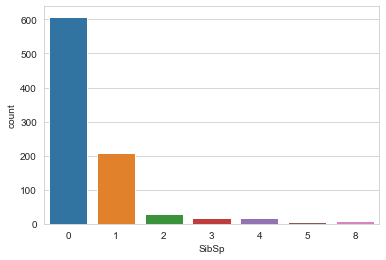

In [50]:
sns.set_style("whitegrid")
sns.countplot(x= "SibSp", data= train)

We can see that roughly 80% of passengers did not have any siblings or spouse. We can check how many of these passengers survived the shipwreck:

In [51]:
train.loc[(train.SibSp == 0) & (train.Survived == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


We can draw a histogram for "Fare" as well:

<AxesSubplot:xlabel='Fare', ylabel='Count'>

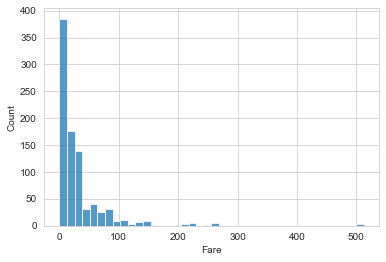

In [52]:
sns.histplot(x= "Fare", data= train, bins= 40)

# 1) Handling missing values and cleaning the data:

We can fill in the missing values of "Age" by the mean or median age of the passengers. To even do better, we can check the average age by passenger class:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

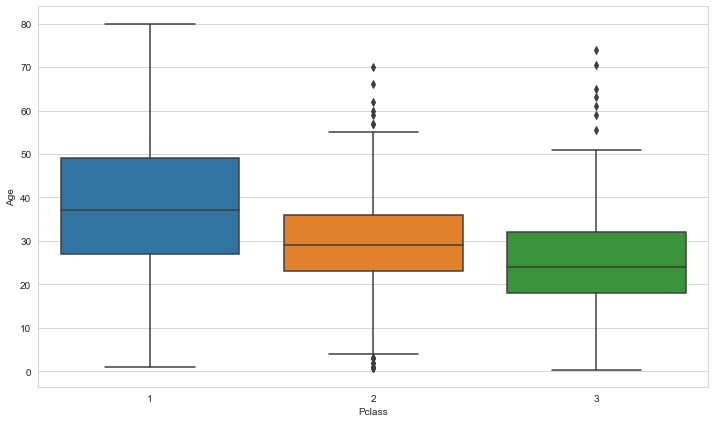

In [53]:
plt.figure(figsize= (12,7))
sns.boxplot(x= "Pclass", y= "Age", data= train)

We can see that the average age for 1st class is about 37, for 2nd class is about 29 and for 3rd class is about 24.

Now, we can map these values to NaN values of the "Age" variable:

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [55]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis= "columns")

Now, we can see that all the NaN values in "Age" are replaced with actual values:

<AxesSubplot:>

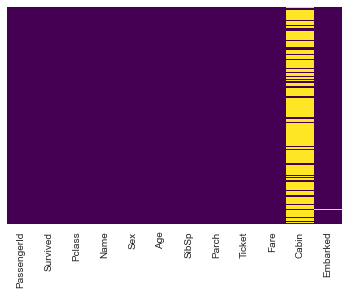

In [56]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= "viridis")

In [57]:
train.loc[:, ["Age"]]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,24.0
889,26.0


Since "Cabin" has too many missing values, it is better to drop the entire column:

In [58]:
train.drop("Cabin", axis= "columns", inplace= True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

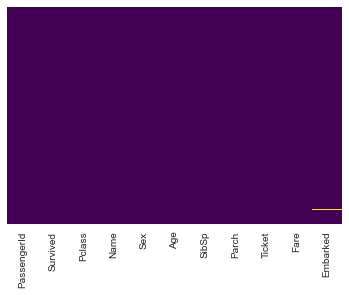

In [60]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= "viridis")

Since "Embarked" has only two missing values, we only drop these two:

In [61]:
train.loc[pd.isnull(train.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [62]:
train.Embarked.fillna("U")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<AxesSubplot:>

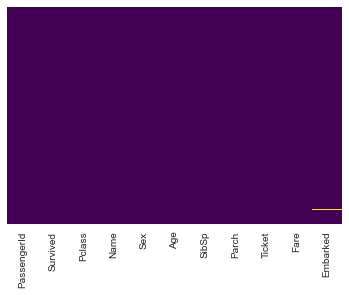

In [63]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= "viridis")

Now, we need to apply one-hot encoding to our categorical variables "Sex" and "Embarked":

In [64]:
sex = pd.get_dummies(train["Sex"], drop_first= True)
embarked = pd.get_dummies(train["Embarked"], drop_first= True)

We now drop "Sex" and "Embarked" because we created new features out of them. We also drop "Name" and "Ticket":

In [65]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis= "columns", inplace= True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [67]:
pd.concat([train,sex,embarked], axis= "columns")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


Now, our data is ready.

"Survived" is our dependant feature and other columns are independent features.

# Building a logistic regression model:

In [68]:
train.drop("Survived", axis= "columns").head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [69]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_val, y_train, y_val = train_test_split(train.drop("Survived", axis= "columns"), 
                                                  train["Survived"], test_size= 0.3, random_state= 101)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [74]:
predictions = clf.predict(X_val)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_val, predictions)

array([[133,  21],
       [ 60,  54]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_val, predictions)

0.6977611940298507

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [80]:
test.Fare.fillna(test.Fare.mean(), inplace= True)

In [81]:
test["Age"] = test[["Age", "Pclass"]].apply(impute_age, axis= "columns")

In [82]:
test.drop("Cabin", axis= "columns", inplace= True)

In [83]:
sex = pd.get_dummies(test["Sex"], drop_first= True)
embarked = pd.get_dummies(test["Embarked"], drop_first= True)

In [84]:
test.drop(["Sex", "Embarked", "Name", "Ticket"], axis= "columns", inplace= True)

In [85]:
pd.concat([test,sex,embarked], axis= "columns")

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [86]:
submission_preds = clf.predict(test)
df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": submission_preds})
df.to_csv('submission.csv', index=False)